<center><img src="https://github.com/Arseny13/Hw_nx/blob/master/images/header.png?raw=1"></center>

<h1><center>Лекция №6: Введение в анализ социальных сетей</center></h1>
<hr>
<h1><center>Домашняя работа</center></h1>

Данное ДЗ является довольно творческим и оно требует довольно много самостоятельной работы, так что не стоит с ним мешкать =)

Вам предлагается выбрать сообщество (или сообщества) в сети ВКонтакте и проанализировать его (их) контингент. 


**Правила:**
* Отчеты принимаются до **23:59 11 ноября**. Вы должны залить ваш ноутбук в github дать на него ссылку в следующей [форме](https://forms.gle/88d9CfaJN5gPV4bB8).
* Работоспособность будет проверяться через [colab](https://colab.research.google.com) (можете сразу давать ссылку на него). Если ноутбук не будет исполняться (падать по ошибке) то все, что будет написано после ошибки не будет учитываться при формировании оценки 
* Вы должны включить код, с помощью которого вы общались с API вконтакте, но для экономии времени, заранее предусмотреть возможность загрузки уже собранных данных (например, как это было реализовано в ноутбуках по кластеризации через `wget` и dropbox или raw данными в github)

**Пожелания:**
* Выбирайте для анализа небольшие сообщества (до 5к), желательно чтобы вы сами в них состояли - это ускорит вычисления и упростит интерпретацию
* Отнеситесь к этой работе как к исследованию - больше графиков и комментариев!
* Красивые визуализации лучше делать через gephi!

# Загрузка данных (2 балла)

Изучите следующие материалы
* [Знакомство с API](https://vk.com/dev/first_guide)
* [Туториал](https://nbviewer.jupyter.org/github/allatambov/Py-programming-3/blob/master/15-06/lect-vk-api.ipynb) по выгрузке данных с помощью VKAPI
* Про метод execute - [туть](https://vk.com/dev/execute) и [туть](http://www.cyberforum.ru/python-web/thread1730446.html)

Выберите сообщество и загрузите
* Идентификаторы всех [участников сообщества](https://vk.com/dev/groups.getMembers)
* [Списки друзей](https://vk.com/dev/friends.get) участников и их признаки (пол, возраст, университет и все, что посчитаете нужным - нам потом группировать по этим атрибутам)
* [Пересечение](https://vk.com/dev/friends.getMutual) между списками друзей

Таким образом вы должны получить замкнутую группу аккаунтов с их друзьями и связями между ними.

Далее - соберите их этого граф в networkX и сохраните в graphml или gml формате

**Замечания:**
* Вконтакте может ограничить вам скорость запросов, поэтому иногда имеет смысл ставить небольшую паузу (`time.sleep(1)`) между запросами и сохранять предварительные результаты
* Код выгрузки может быть написан как с помощью модуля `vk` так и просто с помощью requests 


In [0]:
pip install vk

In [1]:
import vk

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from time import sleep


In [2]:
plt.style.use('seaborn-talk')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

try:
    from ipywidgets import interact, IntSlider, fixed, FloatSlider
except ImportError:
    print(u'Так надо')

In [0]:
token = '48907f4dcc5667c25dd8316c5eec182097cb8bdbf774611f9c553ff47d9cfdafb7a64cd053754dad3db0c'
session = vk.Session(access_token = token) # открыть сессию для работы
api = vk.API(session) # подключиться к API

In [0]:
group = 'msuspeedreading'
res = api.groups.getMembers(group_id = group, v = 5.103,\
                            fields= ['is_closed','sex',\
                            'bdate','universities',\
                                     'city' ,'common_count','education','schools'],count=1000)

items = res['items']
#items

In [0]:
data3= dict() #словарь где ключи id участники группы
for k in range(len(items)):
    q=items[k]['id']
    data3[q] = items[k]
    
data1= dict() #словарь где ключи номер участников группы
for k in range(len(items)):
    data1[int(k)] = items[k]
    
#data1
id = [] # массив if участников
for i in range(len(items)):
    p=data1[i]['id']
    id.append(p)


In [0]:
friends_lists = {}
info_list = dict() # словарь где ключи id друзей участников
i=0
id1 = [] # масив участнкиков которые не приват
for i in range(len(id)):
    q=id[i]
    #sleep(1)
    try:
        
        l = api.friends.get(user_id= q, v = 5.103,count=400,fields=['is_closed','sex', 'bdate', 'city', \
                                                                    'country','universities','education','schools'])
        w=l['items']
        id1.append(q)
        for j in range(len(w)):
            number_friend = w[j]
            id_friend = number_friend['id']
            info_list[id_friend]=number_friend
        friends_lists[q]= l
    except Exception:
        friends_lists[q]= "privat"
        #print("privat",i,q)
        pass
    if i%3==0:
        sleep(1)
    i+=1

In [0]:
id2= [] # массив друзей которые не приват
for i in info_list.items():
    if 'is_closed' in i[1]:
        w = i[1]['is_closed']
        if w!=True:
            #print(w,i[1])
            name_id=i[1]['id']
            id2.append(name_id)
data2= dict() #словарь где 
for k in id:
    if 'privat' not in friends_lists[k]:
        data2[int(k)] = friends_lists[k]['items']
    else:
         data2[int(k)] ='privat'


In [0]:
### Здесь должен быть код преобразования в граф и сохранение в файл

g = nx.Graph()
y=0
for i in id:
    if 'privat' not in friends_lists[i]:
            q=data2[i]
            for j in range(len(q)):
                n=q[j]['id']
                g.add_edge(i,n)
    else:
        g.add_node(i)
        y+=1
            #print(i,q,len(q))


In [0]:
def qaz(id):
    qwe = []
    for i in range(len(friends_lists[id]['items'])):
        q=friends_lists[id]['items'][i]['id']
        if 'is_closed' in  info_list[q]:
            if friends_lists[id]['items'][i]['is_closed']==False:
                if 'deactivated' not in  info_list[q]:
                    qwe.append(q)
            #if friends_lists[id]['items'][0]['is_closed']!=True\
            #and  friends_lists[id]['items'][0]['first_name']!='DELETED':
            #or friends_lists[id]['items'][0]['deactivated']!='banned' or \
             #friends_lists[id]['items'][0]['deactivated']!='deleted '):
                    
    return qwe

In [0]:
j=0
for i in range(len(id1)):
    u_id = id1[i] # id участников
    try:
        l = api.friends.getMutual(source_uid = u_id ,target_uids=qaz(u_id),v=5.103)
        if j%3==0:
            sleep(1)
        j+=1
        for k in range(len(l)):
            p = l[k]['common_friends']
            if p!=[]:
                e=l[k]['id']
                for s in range(len(p)):
                    xc =p[s]
                    if xc in info_list.items():
                        g.add_edge(e,xc)
    except Exception:
            pass

In [0]:
dict2 = data3.copy()

In [0]:
for i in dict2.items():
    if 'city' in i[1]:
        q = i[1]['city']
        i[1]['city_title'] = q['title']
    else:
        i[1]['city_title'] = '-1'
    if 'universities' in i[1] :
        uni = i[1]['universities']
        if uni!=[]:
            i[1]['universities_name1'] = uni[0]['name']
        else:
            i[1]['universities_name1'] = '-1'
    else:
        i[1]['universities_name1'] = '-1'
        
        
        
    if 'schools' in i[1] :
        uni = i[1]['schools']
        if uni!=[]:
            i[1]['schools_name1'] = uni[0]['name']
        else:
            i[1]['schools_name1'] = '-1'
    else:
        i[1]['schools_name1'] = '-1'    
        
        
        
        
    if  'is_closed' in  i[1] :
        if i[1]['is_closed']==True:
            i[1]['is_closed'] = '1'
        else:
            i[1]['is_closed'] = '0'

In [0]:
for i in info_list.items():
    if 'city' in i[1]:
        i[1]['city_title'] = i[1]['city']['title']
    else:
        i[1]['city_title'] = '-1'
    if 'universities' in i[1] :
        uni = i[1]['universities']
        if uni!=[]:
            i[1]['universities_name1'] = i[1]['universities'][0]['name']
        else:
            i[1]['universities_name1'] = '-1'
    else:
        i[1]['universities_name1'] = '-1' 
        
        
        
        
         
    if 'schools' in i[1] :
        uni = i[1]['schools']
        if uni!=[]:
            i[1]['schools_name1'] = uni[0]['name']
        else:
            i[1]['schools_name1'] = '-1'
    else:
        i[1]['schools_name1'] = '-1'        
        
        
        

        
        
        
    if  'is_closed' in  i[1] :
        if i[1]['is_closed']==True:
            i[1]['is_closed'] = '1'
        else:
            i[1]['is_closed'] = '0'

In [0]:
g.add_nodes_from((fid, {'sex': friend.get('sex', '-1'),
                        'bdate': friend.get('bdate', '-1'),
                        
                        'is_closed': friend.get('is_closed','-1') ,
                        'city_title':friend.get('city_title','-1'), 
                        'universities_name1':friend.get('universities_name1'),
                        'schools_name1':friend.get('schools_name1'),
                        'first_name': friend.get('first_name', '-1'), 
                        'last_name': friend.get('last_name', '-1') }) for fid, friend in info_list.items())


g.add_nodes_from((fid, {'sex': friend.get('sex', '-1'),  'bdate': friend.get('bdate', '-1'),
                        'city_title':friend.get('city_title','-1'), 'is_closed': friend.get('is_closed','-1') ,
                        'universities_name1':friend.get('universities_name1'),
                         'schools_name1':friend.get('schools_name1'),
                        'first_name': friend.get('first_name', '-1'), 
                        'last_name': friend.get('last_name', '-1') }) for fid, friend in dict2.items())

In [0]:
g.add_nodes_from((fid, {'count_friends': g.degree[fid]}) for fid in g.nodes())

In [0]:
nx.write_graphml(g, 'g1.graphml')

In [4]:
### Здесь код, который загружает сохраненную сеть
 !wget https://raw.githubusercontent.com/Arseny13/Hw_nx/master/g1.graphml -O g1.graphml


In [ ]:
g2 = nx.read_graphml('g1.graphml')

# Визуализация (1 балл)

* Откройте полученный граф в gephi
* Выберите наиболее удачный на ваш взгляд алгоритм прорисовки
* Добавьте изменение размера вершины в зависимости от степени вершины
* Вставьте скрин-шот ниже

In [2]:
 !mkdir ./foto
 !wget https://raw.githubusercontent.com/Arseny13/Hw_nx/master/foto/1.png -O ./foto/1.png

mkdir: cannot create directory ‘./foto’: File exists
--2019-11-11 09:52:42--  https://raw.githubusercontent.com/Arseny13/Hw_nx/master/foto/1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 396808 (388K) [image/png]
Saving to: ‘./foto/1.png’

./foto/1.png        100%[===================>] 387.51K  --.-KB/s    in 0.02s   

2019-11-11 09:52:42 (23.6 MB/s) - ‘./foto/1.png’ saved [396808/396808]



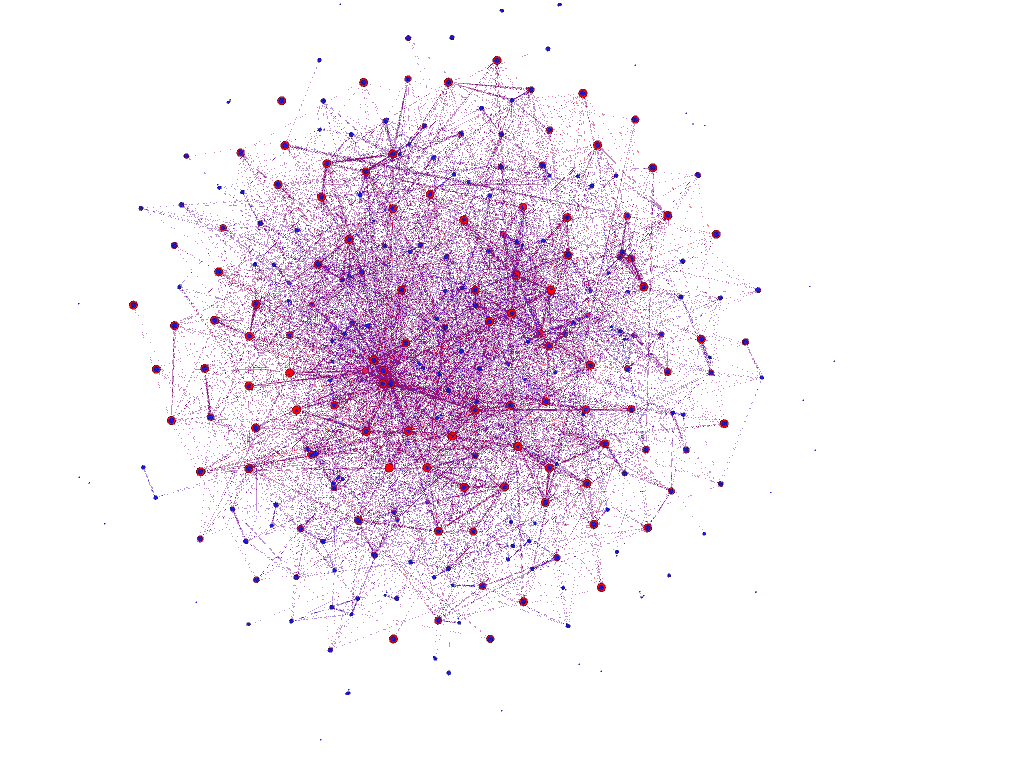

In [42]:
### Ваши картинки и комментарии ниже
from IPython.display import Image
Image('./foto/1.png')
# крассные и большие это у которых много друзей, синие мало друзей

# Центральности вершин (1.5 балла)

Возможно, перед тем как пойти дальше, стоит немного почитстить граф - с помощью [kcore](https://www.google.com/search?client=firefox-b-d&q=networkx+kcore)

* Найдите наиболее влиятельные вершины с точки зрения degree, closeness и betweenness centrality
* Выделите их на картинке в gephi

In [9]:
### Ваш код, картинки и комментарии ниже
print('Сколько было вершин {} и ребер {} до kcore '. format(g2.number_of_nodes(), g2.number_of_edges()))
g3=nx.k_core(g2, k=3)
print('Сколько стало вершин {} и ребер {} после kcore(k=3) '. format(g3.number_of_nodes(), g3.number_of_edges()))

Сколько было вершин 54227 и ребер 64282 до kcore 
Сколько стало вершин 2247 и ребер 8631 после kcore(k=3) 


In [0]:
betw = nx.betweenness_centrality(g3)
close = nx.closeness_centrality(g3)

In [0]:
nx.set_node_attributes(g3,betw,'betw_cent')
nx.set_node_attributes(g3,close,'close_cent')

In [0]:
nx.write_graphml(g3, 'g2.graphml')

In [11]:
!wget https://raw.githubusercontent.com/Arseny13/Hw_nx/master/foto/betw.png -O ./foto/betw.png

--2019-11-11 10:01:48--  https://raw.githubusercontent.com/Arseny13/Hw_nx/master/foto/betw.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 331411 (324K) [image/png]
Saving to: ‘./foto/betw.png’

./foto/betw.png     100%[===================>] 323.64K  --.-KB/s    in 0.02s   

2019-11-11 10:01:49 (15.6 MB/s) - ‘./foto/betw.png’ saved [331411/331411]



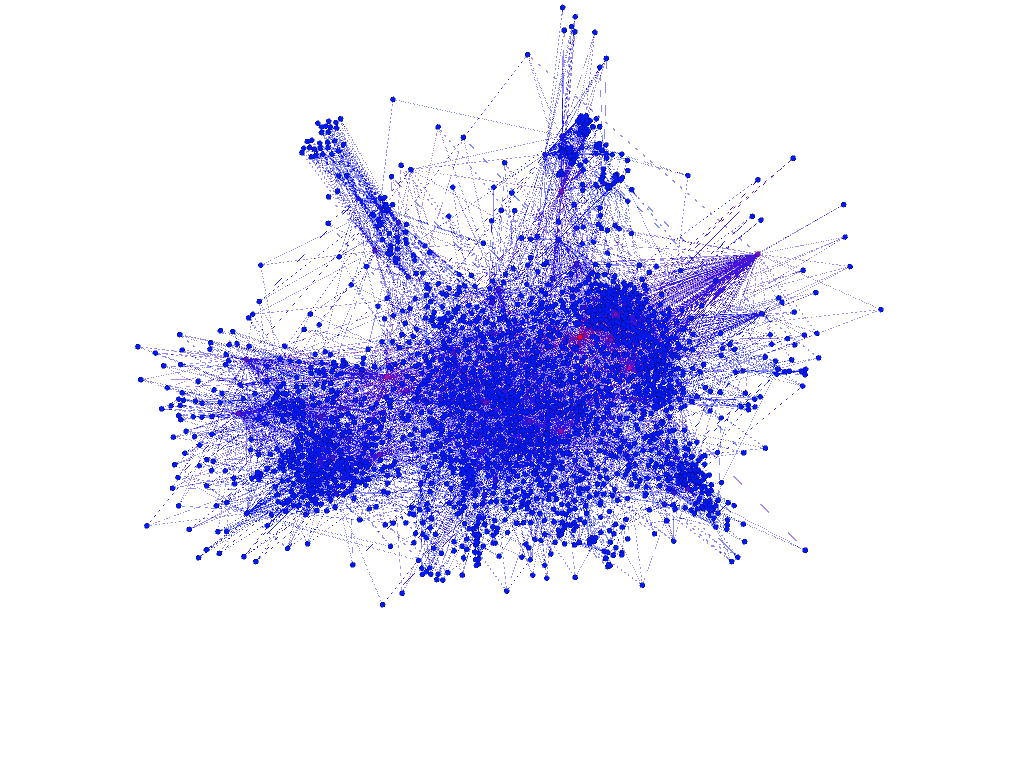

In [12]:
Image("foto/betw.png")

In [13]:
!wget https://raw.githubusercontent.com/Arseny13/Hw_nx/master/foto/close.png -O ./foto/close.png

--2019-11-11 10:02:21--  https://raw.githubusercontent.com/Arseny13/Hw_nx/master/foto/close.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 376777 (368K) [image/png]
Saving to: ‘./foto/close.png’

./foto/close.png    100%[===================>] 367.95K  --.-KB/s    in 0.02s   

2019-11-11 10:02:21 (22.2 MB/s) - ‘./foto/close.png’ saved [376777/376777]



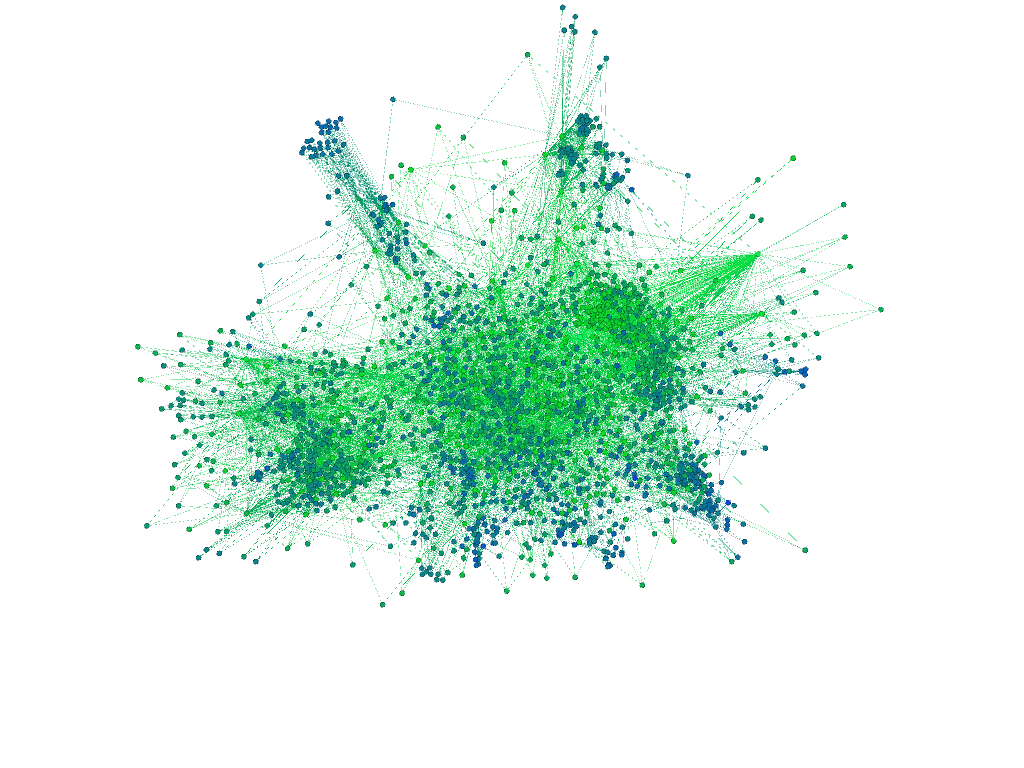

In [14]:
Image("foto/close.png")

In [15]:
!wget https://raw.githubusercontent.com/Arseny13/Hw_nx/master/foto/degree.png -O ./foto/degree.png

--2019-11-11 10:02:59--  https://raw.githubusercontent.com/Arseny13/Hw_nx/master/foto/degree.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 390270 (381K) [image/png]
Saving to: ‘./foto/degree.png’

./foto/degree.png   100%[===================>] 381.12K  --.-KB/s    in 0.02s   

2019-11-11 10:02:59 (21.3 MB/s) - ‘./foto/degree.png’ saved [390270/390270]



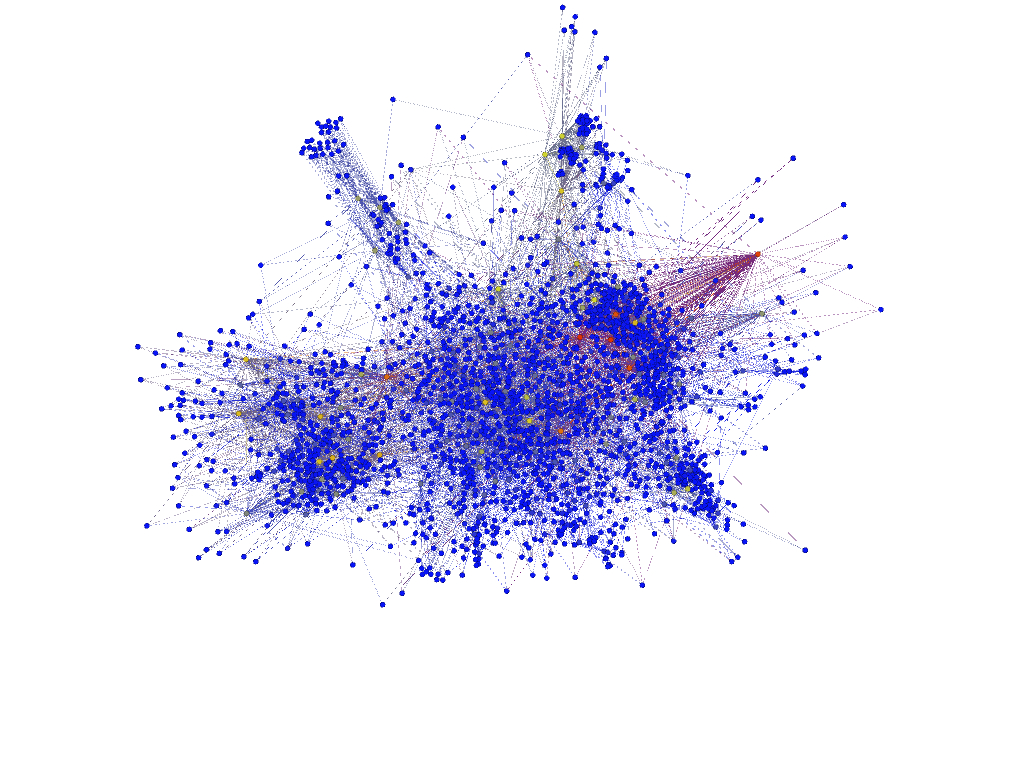

In [16]:
Image("foto/degree.png")

# Сообщества... в сообществе (1.5 балла)

Выберите алгоритм выделения сообществ на графах и алгоритм на основе похожести вершин. Для обоих вариантов
* Выделите сообщества, опираясь на максимальное значение модулярности для полученного разбиения
* Изобразите граф с вершинами, раскрашенными в цвет своего сообщества в gephi
* Попробуйте проинтерпретировать полученные сообщества, кто эти люди, почему они всязаны?
* Какой метод на ваш взгляд сработал лучше?

In [17]:
 !wget https://raw.githubusercontent.com/Arseny13/Hw_nx/master/g2.graphml -O g2.graphml

--2019-11-11 10:03:33--  https://raw.githubusercontent.com/Arseny13/Hw_nx/master/g2.graphml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1298263 (1.2M) [text/plain]
Saving to: ‘g2.graphml’

g2.graphml          100%[===================>]   1.24M  --.-KB/s    in 0.02s   

2019-11-11 10:03:33 (50.3 MB/s) - ‘g2.graphml’ saved [1298263/1298263]



In [28]:
### Ваш код, картинки и комментарии ниже
g4 = nx.read_graphml('g2.graphml')

In [29]:
g5 = nx.Graph()
g6 = nx.disjoint_union(g4, g5)

In [30]:
g6.number_of_nodes()

2247

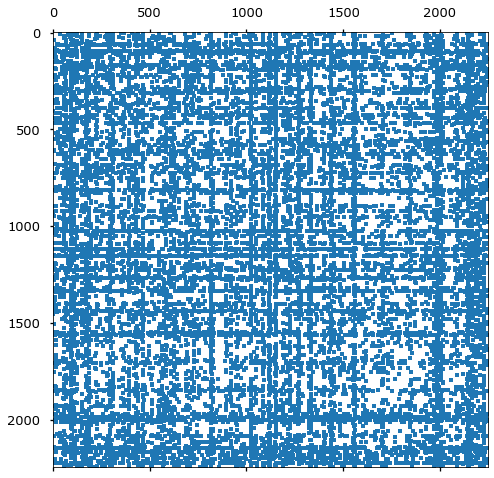

In [31]:
A = nx.adj_matrix(g6)
plt.spy(A, markersize=4)

In [32]:
# Все положительные похожести по Жаккару
jac = nx.jaccard_coefficient(g6)
jac = np.array(list(jac))

In [33]:
# Немного магии, чтобы получить из этого матрицу попарных СХОЖЕСТЕЙ по жаккару
from scipy.sparse import coo_matrix

# Переводим все в формат разреженной матрицы
D = coo_matrix((jac[:,2],\
                (jac[:,0],\
                 jac[:,1])),\
                 shape=(2247,2247))
# Делаем ее симметричной
D = D+D.T

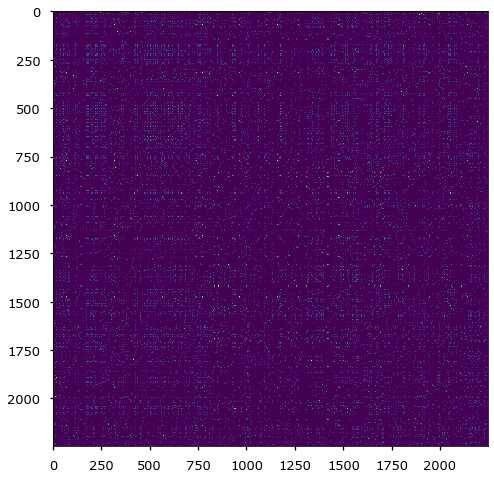

In [34]:
plt.imshow(D.toarray())

In [35]:
from sklearn.cluster import SpectralClustering

In [37]:
model = SpectralClustering(n_clusters=10, affinity='precomputed')
model.fit(D)


SpectralClustering(affinity='precomputed', assign_labels='kmeans', coef0=1,
                   degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
                   kernel_params=None, n_clusters=10, n_init=10, n_jobs=None,
                   n_neighbors=10, random_state=None)

In [38]:
labels = model.labels_
len(set(labels))

10

In [39]:
for i_id in g6.nodes():
    g6.node[i_id]['clas'] = '{}'.format(labels[i_id])

In [40]:
nx.write_graphml(g6, 'g6.graphml')

In [29]:
!wget https://raw.githubusercontent.com/Arseny13/Hw_nx/master/foto/clas1.png -O ./foto/clas1.png

--2019-11-11 10:05:28--  https://raw.githubusercontent.com/Arseny13/Hw_nx/master/foto/clas1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217462 (212K) [image/png]
Saving to: ‘./foto/clas1.png’

./foto/clas1.png    100%[===================>] 212.37K  --.-KB/s    in 0.02s   

2019-11-11 10:05:28 (13.4 MB/s) - ‘./foto/clas1.png’ saved [217462/217462]



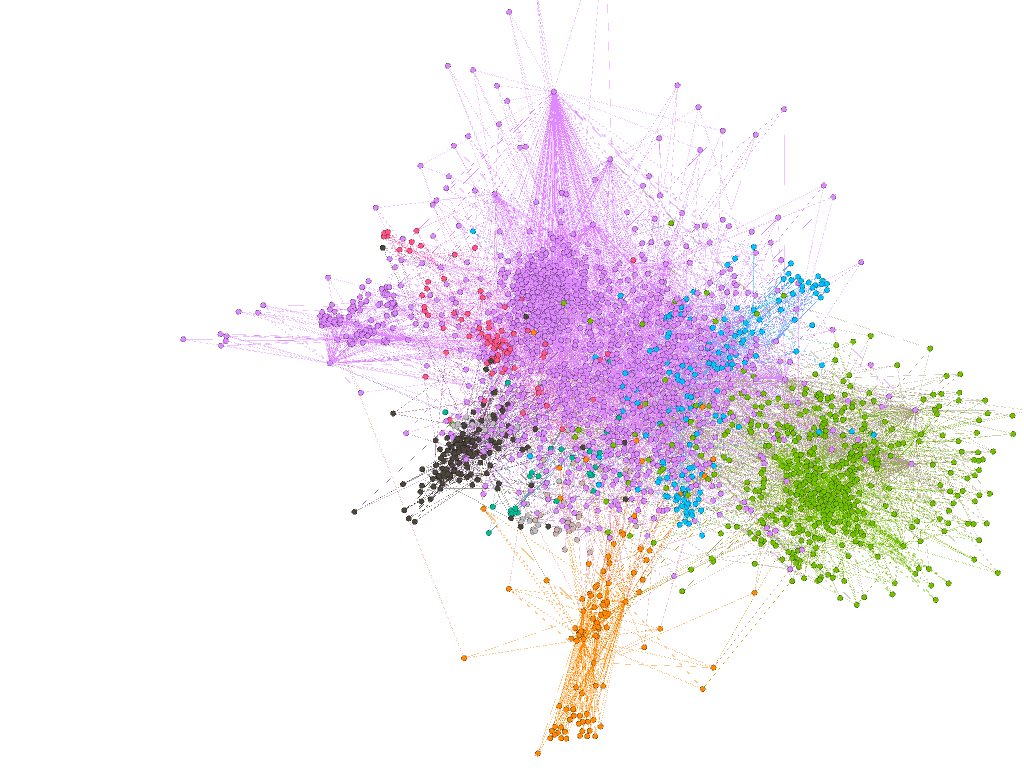

In [44]:
Image("foto/clas1.png") #

In [0]:
Наверное разбиение идет по вузам и школам 

In [21]:
g4 = nx.read_graphml('g2.graphml')

In [22]:
g3=nx.k_core(g4, k=6)
print('Сколько стало вершин {} и ребер {} после kcore(k=6) '. format(g3.number_of_nodes(), g3.number_of_edges()))

Сколько стало вершин 314 и ребер 1865 после kcore(k=6) 


In [23]:
eb_partitions = nx.community.girvan_newman(g3)

In [24]:
# Просто функция, которая считает модулярность
from itertools import product
def modularity(G, communities, weight='weight'):
    multigraph = G.is_multigraph()
    directed = G.is_directed()
    m = G.size(weight=weight)
    if directed:
        out_degree = dict(G.out_degree(weight=weight))
        in_degree = dict(G.in_degree(weight=weight))
        norm = 1 / m
    else:
        out_degree = dict(G.degree(weight=weight))
        in_degree = out_degree
        norm = 1 / (2 * m)

    def val(u, v):
        try:
            if multigraph:
                w = sum(d.get(weight, 1) for k, d in G[u][v].items())
            else:
                w = G[u][v].get(weight, 1)
        except KeyError:
            w = 0
        # Double count self-loops if the graph is undirected.
        if u == v and not directed:
            w *= 2
        return w - in_degree[u] * out_degree[v] * norm

    Q = sum(val(u, v) for c in communities for u, v in product(c, repeat=2))
    return Q * norm

In [25]:
k = 0
mod_max = 0
for partition in eb_partitions:
    print('iter ', k)
    k+=1
    num_com = len(partition)
    if num_com < 10:
        mod = modularity(g3, partition)
        if(mod>mod_max):
            mod_max = mod
            best_part = partition
        print('For {} communities modularity = {}'.format(num_com, mod))
    else:
        break

iter  0
For 2 communities modularity = 0.3437379697978759
iter  1
For 3 communities modularity = 0.35078782999955754
iter  2
For 4 communities modularity = 0.35342351343003825
iter  3
For 5 communities modularity = 0.35515916882898024
iter  4
For 6 communities modularity = 0.3552580698488948
iter  5
For 7 communities modularity = 0.36068986336425973
iter  6
For 8 communities modularity = 0.3609658662105399
iter  7
For 9 communities modularity = 0.3609966290277807
iter  8


In [26]:
dict_clust_g_n = {}
for i, val in enumerate(best_part):
    for j in val:
        dict_clust_g_n[j] = i
G = g4.copy()
nx.set_node_attributes(G, dict_clust_g_n, 'cluster_gir_new')
nx.write_graphml(G, 'g_n.graphml')

In [ ]:
!wget https://raw.githubusercontent.com/Arseny13/Hw_nx/master/foto/eb1.png -O ./foto/eb1.png

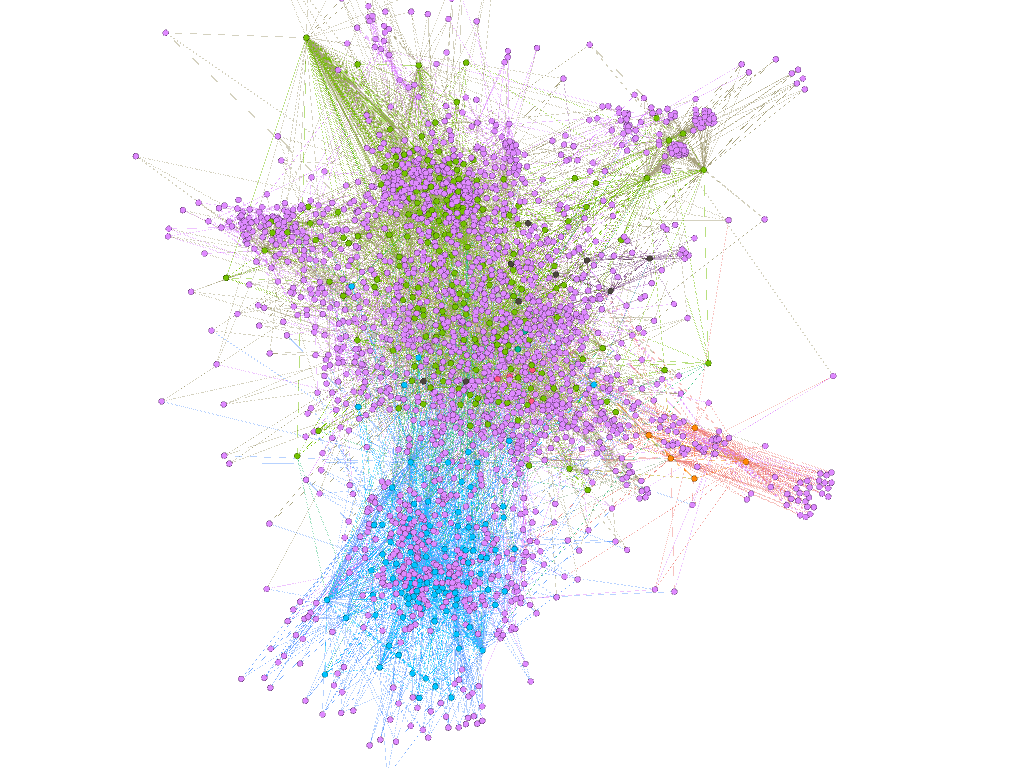

In [43]:
Image("foto/eb1.png") # мой класс розовый

In [0]:
Итог:
    Картинки более менее похожы , некоторые точки убежали в другой класстер. Разбиение идет по вузам наврнео ,
    фиолетовые это МГУшники

# Асортативность по признакам (1.5 балла)

* Посчитайте коэффициенты асортативности для признаков вершин (пол, возраст, университет, школа, город, количество друзей, etc)
* Проинтерпретируйте полученные результаты

In [ ]:
!wget https://raw.githubusercontent.com/Arseny13/Hw_nx/master/g1.graphml -O g1.graphml

In [3]:
### Ваш код, картинки и комментарии ниже
g4 = nx.read_graphml('g1.graphml')
attributes = g4.node['489510535'] # на colab g4.nodes['489510535']
attributes

{'sex': 2,
 'is_closed': '0',
 'city_title': '-1',
 'universities_name1': '-1',
 'schools_name1': '-1',
 'first_name': 'Арсений',
 'last_name': 'Изимов',
 'count_friends': 36,
 'bdate': '13.5.1998'}

In [ ]:
for attr in attributes:
    if attr!='last_name': # есть люди у которых вместо фамилии смайлы
        print('{} assortativity = {}'.format(attr, 
                                         nx.assortativity.attribute_assortativity_coefficient(g4, attr)))

sex assortativity = 0.140832472672234
is_closed assortativity = -0.07532401737913184
city_title assortativity = 0.0848705914944445
universities_name1 assortativity = -0.03261829585458462
schools_name1 assortativity = 0.022009115445812178
first_name assortativity = 0.0016267236063867586
count_friends assortativity = -0.1856218394248088


In [18]:
nx.assortativity.degree_assortativity_coefficient(g4)

-0.39902007563433767

In [ ]:
The tallest assortativity - пол и город, что довольно понятно мы же в москве живем , а группа МГУ ридинг.
Еще можно отметить что коэф школы положителен , что значит есть много друзей из одних школ.